  # <font color='skyblue' style='font-size: 66px;'> **Supermarket sales Analysis**</font>




## <font color='orange' style='font-size: 33px;'> Configurando el Ambiente</font>

___

 - Definir las variables Globales



1.   df_ventas
2.   df_ventas_limpio
3.   df_ventas_liquidacion



### <font color='darkgrey' style='font-size: 33px;'>  Importando librerias</font>

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### <font color='darkgrey' style='font-size: 33px;'> Comprobacion de las Librerias</font>


In [ ]:
!python -V
print('------')
!pip show pandas | grep 'Name\|Version'
print('------')
!pip show matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


## <font color='orange' style='font-size: 33px;'>  Obtencion de Datos y tratamiento de datos</font>

---

### <font color='darkgrey' style='font-size: 33px;'>  Información del DataFrame</font>


In [ ]:
# Cargar el archivo CSV
df_ventas = pd.read_csv("reporte_ventas.csv")

# Mostrar información general sobre el DataFrame
print('Información:')
print(df_ventas.info())
print('-----------------------')

# Identificar y contar los duplicados
print('Duplicados:')
print(df_ventas.duplicated().sum())
print('-----------------------')

# Contar los registros de prueba ('prueba' en la columna 'nombre_cliente')
print('Registros de prueba:')
print((df_ventas['nombre_cliente'] == 'prueba').sum())
print('-----------------------')

# Contar los registros con ganancia menor o igual a cero
print('Registros con ganancia <= 0:')
print((df_ventas['total_ganancia'] <= 0).sum())

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int6

### <font color='darkgrey' style='font-size: 33px;'>  Tratamiento de datos</font>

- Mediante el manejo de la biblioteca pandas de Python, trataremos los datos para limpiarlos y clasificarlos
- Se guardaran los DataFrames df_ventas_limpio y df_ventas_liquidación

In [ ]:
def obtencion_datos():
    global df_ventas, df_ventas_limpio, df_ventas_liquidacion

    # 1. Cargar el archivo "reporte_ventas.csv" en df_ventas
    df_ventas = pd.read_csv('reporte_ventas.csv')

    # 2. Formatear columnas de fechas
    df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
    df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')

    # 3. Eliminar registros duplicados y guardar en df_ventas_limpio
    df_ventas_limpio = df_ventas.drop_duplicates()

    # 4. Eliminar registros de prueba por 'nombre_cliente'y actualizar df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']

    # 5. Eliminar filas con valor nulo en 'nombre_cliente'y actualizar df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])

    # 6. Filtrar operaciones sin ganancia y actualizar df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]

    # 7. Actualizar el índice utilizando el método reset_index
    df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)

    # 8. Filtar operaciones para obtener resultados sin ganancia y actualizar df_ventas_liquidacion
    df_ventas_liquidacion = df_ventas[df_ventas['total_ganancia'] <= 0]

    # 9. Actualizar el indice utilizando el método reset_index
    df_ventas_liquidacion = df_ventas_liquidacion.reset_index(drop=True)

    # Imprimir las primeras filas del DataFrame limpio
    print("Primeras filas del DataFrame limpio:")
    print('-----------------------------------------------------------------')
    print(df_ventas_limpio.head())


    # Devolver el DataFrame limpio
    return df_ventas_limpio, df_ventas_liquidacion

# Llamar a la función para ejecutar el proceso
df_ventas_limpio,df_ventas_liquidacion = obtencion_datos()
print()
print('-----------------------------------------------------------------')
print('Informacion DataFrame liquidacion:')
print('-----------------------------------------------------------------')
df_ventas_liquidacion.info()

  La funcion de Python, llamada obtencion_datos() realiza lo siguiente:
  - Importa las variables globales "df_ventas", "df_ventas_limpio" y "df_ventas_liquidacion" para que puedan ser modificadas y para utilizarlas dentro de la función.
  - Cargar el archivo "reporte_ventas.csv" en el DataFrame "df_ventas" , luego mediante el tratamiento de datos con la libreria Pandas obtiene el DataFrame "df_ventas_limpio".
  - Filtra operaciones para obtener los registros que tuvieron resultados sin ganancia, creando el DataFrame "df_ventas_liquidacion" que contiene solo las filas del DataFrame original "df_ventas" donde 'total_ganancia' es menor o igual a cero
  - La función devuelve dos DataFrames, "df_ventas_limpio" y "df_ventas_liquidacion", que contienen datos limpios y filtrados para su uso posterior en análisis o visualización.
  
  
  


### <font color='darkgrey' style='font-size: 33px;'>   Información de dataframe limpio</font>

In [ ]:
# Cargar el archivo CSV
df_ventas = pd.read_csv("reporte_ventas.csv")

# Mostrar información general sobre el DataFrame
print('Información:')
print(df_ventas_limpio.info())
print('-----------------------')

# Identificar y contar los duplicados
print('Duplicados:')
print(df_ventas_limpio.duplicated().sum())
print('-----------------------')

# Contar los registros de prueba ('prueba' en la columna 'nombre_cliente')
print('Registros de prueba:')
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
print('-----------------------')

# Contar los registros con ganancia menor o igual a cero
print('Registros con ganancia <= 0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum())

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           7210 non-null   datetime64[ns]
 1   fecha_envio            7210 non-null   datetime64[ns]
 2   modo_envio             7210 non-null   object        
 3   nombre_cliente         7210 non-null   object        
 4   segmento_cliente       7210 non-null   object        
 5   ciudad                 7210 non-null   object        
 6   estado                 7210 non-null   object        
 7   region                 7210 non-null   object        
 8   departamento_producto  7210 non-null   object        
 9   tipo_producto          7210 non-null   object        
 10  precio_base            7210 non-null   float64       
 11  precio_unit_sin_desc   7210 non-null   float64       
 12  descuento              7210 non-null   float64   

## <font color='orange' style='font-size: 33px;'>  1 -  ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?</font>

___

### <font color='darkgrey' style='font-size: 33px;'> 1.1 Preparacion de los datos</font>

In [ ]:
def pregunta_1():
    # Definir variables globales
    global df_ventas_limpio, df_ventas_año

    # Crear una copia de df_ventas_limpio con las columnas necesarias
    df_ventas_año = df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()

    # Crear una nueva columna 'año' y eliminar 'fecha_pedido'
    df_ventas_año['año'] = df_ventas_año['fecha_pedido'].dt.year
    df_ventas_año.drop(columns=['fecha_pedido'], inplace=True)

    # Agrupar por 'año' y sumarizar 'total_venta'
    df_ventas_año = df_ventas_año.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()

    # Calcular porcentaje vs al año anterior
    porcentajes = []
    for i in range(1, len(df_ventas_año)):
        porcentaje = ((df_ventas_año['total_venta'][i] / df_ventas_año['total_venta'][i - 1]) - 1) * 100
        porcentajes.append(porcentaje)

    # Agregar la lista de porcentajes al DataFrame
    df_ventas_año['porc_años'] = [None] + porcentajes

    # Formatear el porcentaje con 1 decimal
    df_ventas_año['porc_años'] = df_ventas_año['porc_años'].round(1)


# Llamar a la función para ejecutar el proceso
pregunta_1()

df_ventas_año


,año,total_venta,porc_años
0,2019,1052735.86,NaN
1,2020,1190541.40,13.1
2,2021,1535801.44,29.0
3,2022,1825927.50,18.9


### <font color='darkgrey' style='font-size: 33px;'>1.2 Visualización</font>

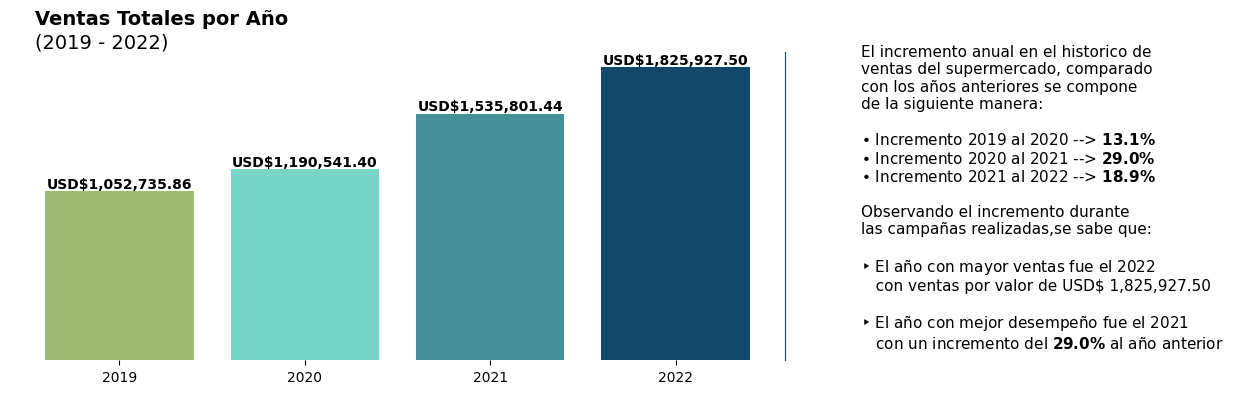

In [ ]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 4))

# Configuración de los datos para el gráfico
ejeX = df_ventas_año['año']
ejeY = df_ventas_año['total_venta']
colores = ['#9FBB73', '#78D6C6', '#419197', '#12486B']

# Crear el gráfico de barras verticales
ax.bar(ejeX, ejeY, color=colores, width=0.8)

# Colocar los valores sobre cada barra
for bar in ax.patches:
    valor = bar.get_height()
    qtd = f"USD${valor:,.2f}"  # Formatear el valor con símbolo de dólar y comas
    ax.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd,
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Configuración de titulo y subtitulo
fig.text(00.15, 0.95, 'Ventas Totales por Año', fontsize=14, fontweight='bold')
fig.text(00.15, 0.89, '(2019 - 2022)', fontsize=14)

# Quitar valores del eje x y todos los bordes
ax.set_xticks([])  # Quitar marcas del eje x
ax.spines['top'].set_color('none')  # Ocultar borde superior
ax.spines['right'].set_color('#12486B')  # Ocultar borde derecho
ax.spines['bottom'].set_color('none')  # Ocultar borde inferior
ax.spines['left'].set_color('none')  # Ocultar borde izquierdo

# Ajustar informacion de ejes X y Y
ax.set_xticks([2019,2020,2021,2022])
ax.set_yticks([])
# Añadir comentario dentro del gráfico
comentario_x = ejeX[0] + 4  # Ajustar según sea necesario
comentario_y = ax.get_ylim()[1] * 0.5
comentario_texto = (
    f'El incremento anual en el historico de\n'
    f'ventas del supermercado, comparado\n'
    f'con los años anteriores se compone\n'
    f'de la siguiente manera:\n'
    f'\n'
    f'$\u2022$ Incremento 2019 al 2020 --> $\\bf{{{df_ventas_año.porc_años[1]}\%}}$\n'
    f'$\u2022$ Incremento 2020 al 2021 --> $\\bf{{{df_ventas_año.porc_años[2]}\%}}$\n'
    f'$\u2022$ Incremento 2021 al 2022 --> $\\bf{{{df_ventas_año.porc_años[3]}\%}}$\n'
    f'\n'
    f'Observando el incremento durante\n'
    f'las campañas realizadas,se sabe que:\n'
    f'\n'
    f'$\u2023$ El año con mayor ventas fue el 2022\n'
    f'   con ventas por valor de USD$ {df_ventas_año.total_venta[3]:,.2f}\n'
    f'\n'
    f'$\u2023$ El año con mejor desempeño fue el 2021\n'
    f'   con un incremento del $\\bf{{{df_ventas_año.porc_años[2]:.1f}\%}}$ al año anterior\n'
    )
ax.text(comentario_x, comentario_y, comentario_texto, ha='left', va='center', fontsize=11)

# Mostrar el gráfico
plt.show()

## <font color='darkgrey' style='font-size: 33px;'> Conclusión de la primera pregunta </font>

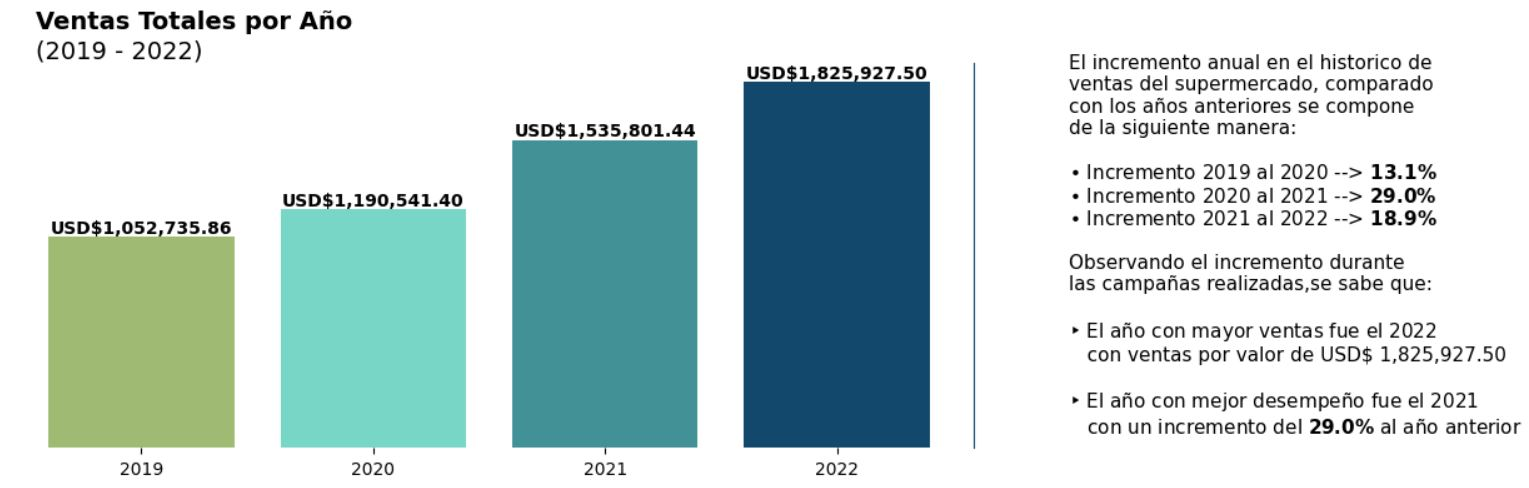

## <font color='orange' style='font-size: 33px;'>  2 -  ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?</font>


___

### <font color='darkgrey' style='font-size: 33px;'> 2.1 Preparacion de los datos</font>

In [ ]:
def pregunta_2():
    # Definir variables globales
    global df_ventas_limpio, df_top_ganancias

    # Crear una copia de df_ventas_limpio con las columnas necesarias
    df_top_ganancias = df_ventas_limpio[['tipo_producto', 'total_ganancia']].copy()

    # Agrupar por 'tipo_producto' y sumarizar 'total_ganancia', ordenar en orden descendente
    df_top_ganancias = df_top_ganancias.groupby('tipo_producto').aggregate({'total_ganancia': 'sum'}).sort_values(by='total_ganancia', ascending=False).reset_index()

    # Seleccionar y guardar únicamente los primeros 7 registros
    df_top_ganancias = df_top_ganancias.head(7)

    # Para ordenar el formato de salida , se invierte el orden de los registros
    df_top_ganancias = df_top_ganancias[::-1]


# Llamar a la función para ejecutar el proceso
pregunta_2()

In [ ]:
df_top_ganancias

,tipo_producto,total_ganancia
6,Bolsas de basura,53328.46
5,Detergente para ropas,55766.39
4,Jeans,55982.95
3,Smartphones,64705.58
2,Cámaras digitales,80192.63
1,Laptops,91148.67
0,Lámparas LED,111453.41


### <font color='darkgrey' style='font-size: 33px;'> 2.2 Visualización</font>

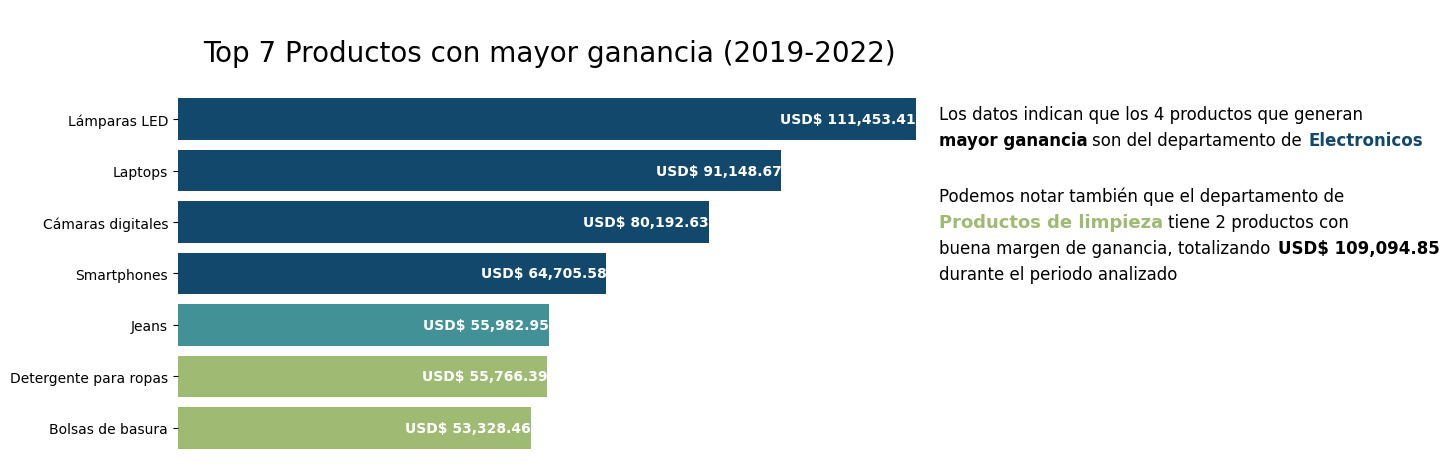

In [ ]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 5))

# Configuración de los datos para el gráfico
ejeX = df_top_ganancias['total_ganancia']
ejeY = df_top_ganancias['tipo_producto']
colores = ['#9FBB73', '#9FBB73', '#419197', '#12486B', '#12486B', '#12486B', '#12486B']

# Crear el gráfico de barras horizontales
ax.barh(ejeY, ejeX, color=colores, align='center')

# Colocar los valores sobre cada barra
for i, valor in enumerate(df_top_ganancias['total_ganancia']):
    qtd = f"USD$ {valor:,.2f}"  # Formatear el valor con símbolo de dólar y comas
    ax.text(valor, i, qtd, ha='right', va='center', color='w', fontweight='bold')

# Configuración de titulo
fig.text(00.15, 0.98, ' ',fontsize=20)
fig.text(00.15, 0.92, 'Top 7 Productos con mayor ganancia (2019-2022)', fontsize=20,fontweight='bold')

# Quitar valores del eje x y todos los bordes
ax.set_xticks([])  # Quitar marcas del eje x
ax.spines['top'].set_color('none')  # Ocultar borde superior
ax.spines['right'].set_color('none')  # Ocultar borde derecho
ax.spines['bottom'].set_color('none')  # Ocultar borde inferior
ax.spines['left'].set_color('none')  # Ocultar borde izquierdo

# Suma productos de limpieza
total_suma = df_top_ganancias.total_ganancia[6] + df_top_ganancias.total_ganancia[5]
resultado = f'USD$ {total_suma:,.2f}'

# Agregar comentario
ax.text(115000,6.0,"Los datos indican que los 4 productos que generan",fontsize=12)
ax.text(115000,5.5,"mayor ganancia",fontsize=12, fontweight='bold')
ax.text(138000,5.5,"son del departamento de",fontsize=12)
ax.text(170800,5.5,"Electronicos",fontsize=12,color='#12486B',fontweight='bold')
ax.text(115000,4.4,"Podemos notar también que el departamento de",fontsize=12)
ax.text(115000,3.9,"Productos de limpieza",fontsize=13,color='#9FBB73',fontweight='bold')
ax.text(149500,3.9,"tiene 2 productos con",fontsize=12)
ax.text(115000,3.4,"buena margen de ganancia, totalizando",fontsize=12)
ax.text(166050,3.4,"USD$ 109,094.85",fontsize=12,fontweight='bold')
ax.text(115000,2.9,"durante el periodo analizado",fontsize=12)

# Mostrar el gráfico
plt.show()

## <font color='darkgrey' style='font-size: 33px;'> Conclusión de la segunda pregunta </font>

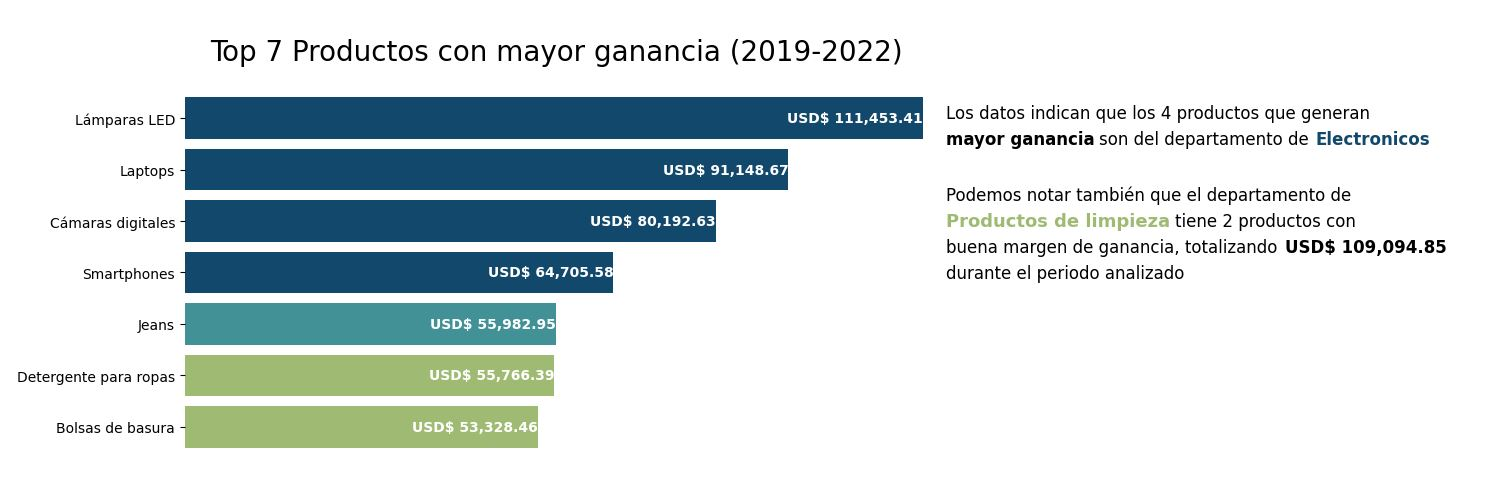

## <font color='orange' style='font-size: 33px;'>  3 - Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas? </font>

### <font color='darkgrey' style='font-size: 33px;'> 3.1 Preparacion de los datos</font>

In [ ]:
def pregunta_3():
    # Definir variables globales
    global df_ventas_limpio, df_ventas_año_region

    # Crear una copia de df_ventas_limpio con las columnas necesarias
    df_ventas_año_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()

    # Crear una nueva columna 'año' y eliminar la columna 'fecha_pedido'
    df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year
    df_ventas_año_region.drop(columns=['fecha_pedido'], inplace=True)

    # Generar una tabla cruzada con pd.crosstab
    df_ventas_año_region = pd.crosstab(index=df_ventas_año_region['año'], columns=df_ventas_año_region['region'],
                                       values=df_ventas_año_region['total_venta'], aggfunc='sum')

    # Reordenar las columnas según el orden deseado
    orden_columnas = ['Sureste', 'Noreste', 'Centro-Oeste', 'Norte', 'Sur']
    df_ventas_año_region = df_ventas_año_region.reindex(columns=orden_columnas)

    # Calcular el porcentaje de ventas para cada región
    region = df_ventas_año_region[['Sureste', 'Noreste', 'Centro-Oeste', 'Norte', 'Sur']].sum()
    total = region.sum()

    # Calcular el porcentaje para cada región
    sureste = region['Sureste'] / total * 100
    noreste = region['Noreste'] / total * 100
    centro_oeste = region['Centro-Oeste'] / total * 100
    norte = region['Norte'] / total * 100
    sur = region['Sur'] / total * 100

# Llamar a la función para ejecutar el proceso
pregunta_3()

df_ventas_año_region


region,Sureste,Noreste,Centro-Oeste,Norte,Sur
año,,,,,
2019,522953.51,346407.40,67406.37,71778.74,44189.84
2020,648732.79,282431.39,90616.80,107309.38,61451.04
2021,870894.51,359829.92,125344.52,69534.02,110198.47
2022,980404.44,549254.20,97679.64,99195.86,99393.36


### <font color='darkgrey' style='font-size: 33px;'> 3.2 Visualización </font>

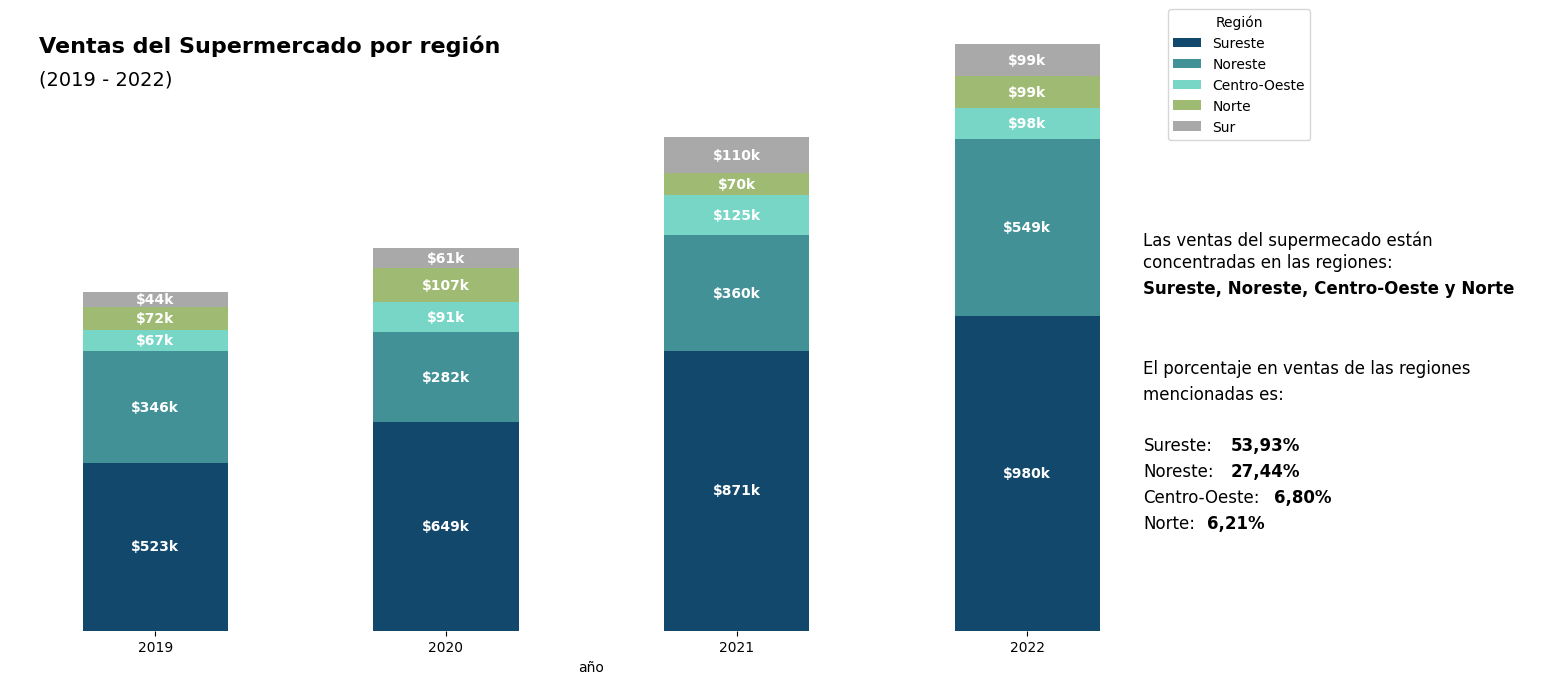

In [ ]:
# Configuración de colores
colores = ['#12486B', '#419197', '#78D6C6', '#9FBB73', '#A9A9A9']

# Crear el gráfico de columnas apiladas
ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores)

# Ordenar las filas del DataFrame por año
df_ventas_año_region = df_ventas_año_region.sort_values(by='año')

# Colocar valores de cada barra
for container in ax.containers:
    labels = [f"${height/1000:.0f}k" for height in container.datavalues]  # Convertir a texto y adicionar símbolo de $ al inicio
    ax.bar_label(container, label_type='center', labels=labels, fontsize=10, color='w', fontweight='bold')  # Agregar borde negro)

# Configuración de titulo y subtitulo
ax.text(-0.4, 1800000, 'Ventas del Supermercado por región', fontsize=16, fontweight='bold')
ax.text(-0.4, 1700000, '(2019 - 2022)', fontsize=14)

# Configuración de la leyenda
ax.legend(title='Región', bbox_to_anchor=(0.99, 1.02))


# Quitar valores del eje Y
ax.set_yticks([])

ax.spines['top'].set_color('none')  # Ocultar borde superior
ax.spines['right'].set_color('none')  # Ocultar borde derecho
ax.spines['bottom'].set_color('none')  # Ocultar borde inferior
ax.spines['left'].set_color('none')  # Ocultar borde izquierdo

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Agregar comentario
ax.text(3.4,1200000,"Las ventas del supermecado están",fontsize=12)
ax.text(3.4,1130000,"concentradas en las regiones:",fontsize=12)
ax.text(3.4,1050000,"Sureste, Noreste, Centro-Oeste y Norte       ",fontsize=12,fontweight="bold")
ax.text(3.4,800000,"El porcentaje en ventas de las regiones",fontsize=12)
ax.text(3.4,720000,"mencionadas es:",fontsize=12)
ax.text(3.4,560000,"Sureste:",fontsize=12)
ax.text(3.7,560000,"53,93%",fontsize=12,fontweight="bold")
ax.text(3.4,480000,"Noreste:",fontsize=12)
ax.text(3.7,480000,"27,44%",fontsize=12,fontweight="bold")
ax.text(3.4,400000,"Centro-Oeste:",fontsize=12)
ax.text(3.85,400000,"6,80%",fontsize=12,fontweight="bold")
ax.text(3.4,320000,"Norte:",fontsize=12)
ax.text(3.62,320000,"6,21%",fontsize=12,fontweight="bold")


# Mostrar el gráfico
plt.show()

## <font color='darkgrey' style='font-size: 33px;'> Conclusión de la tercera pregunta </font>

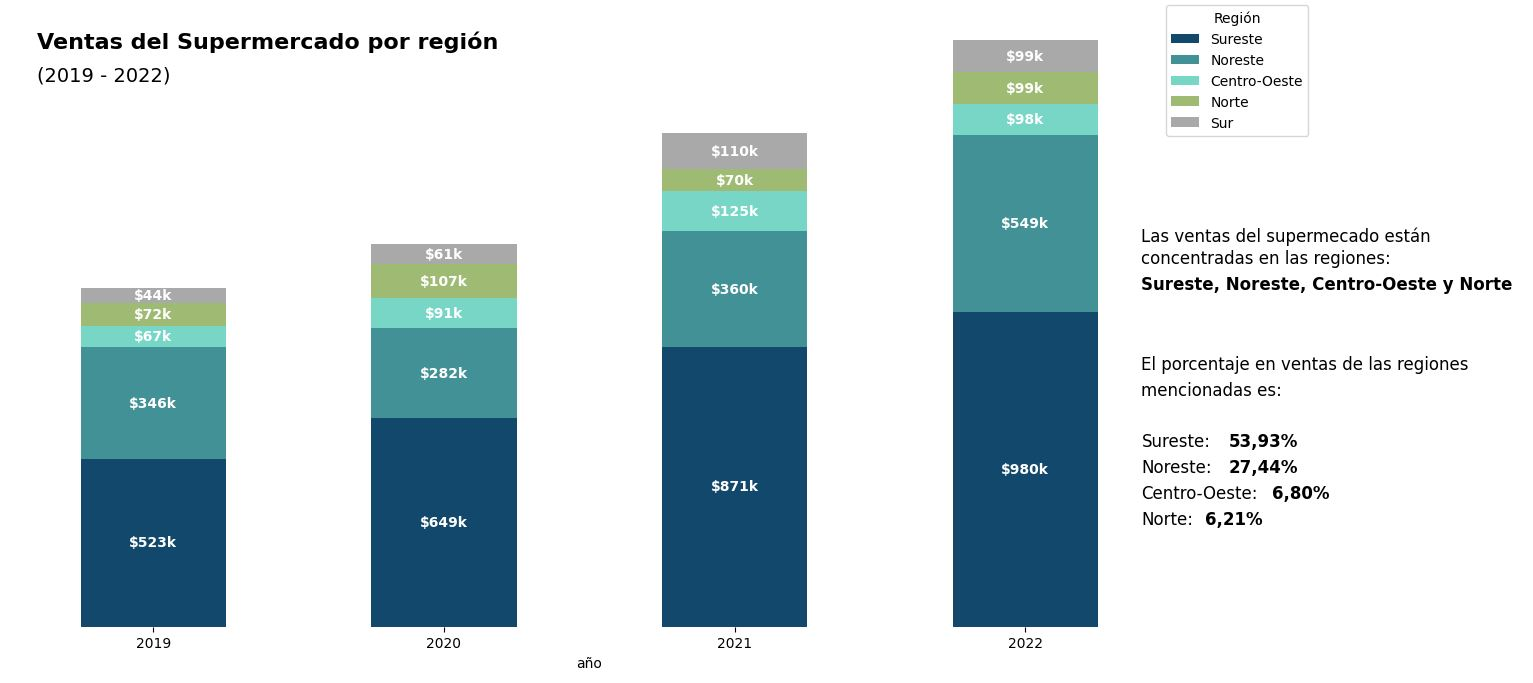

## <font color='orange' style='font-size: 33px;'>  4 - ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?</font>

### <font color='darkgrey' style='font-size: 33px;'> 4.1 Preparacion de los datos</font>

In [ ]:
def pregunta_4():
    # Definir variable global
    global df_ventas_limpio, df_modo_envio

    # Crear una copia de df_ventas_limpio con las columnas 'modo_envio' y 'segmento_cliente'
    df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()

    # Generar una tabla cruzada con pd.crosstab
    tabla_cruzada = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente']).sort_values("B2B")

    # Calcular la suma por modo de envío
    tabla_cruzada['Total'] = tabla_cruzada.sum(axis=1)

    # Calcular la suma total global
    total_global = tabla_cruzada['Total'].sum()

    # Calcular el porcentaje en relación con el total global y multiplicar por 100
    tabla_cruzada['Porcentaje'] = (tabla_cruzada['Total'] / total_global) * 100

    # Formatear el porcentaje con 1 decimal
    tabla_cruzada['Porcentaje'] = tabla_cruzada['Porcentaje'].round(1)

    # Guardar el resultado en df_modo_envio
    df_modo_envio = tabla_cruzada

# Llamar a la función para ejecutar el proceso
pregunta_4()

# Mostrar el DataFrame resultante
df_modo_envio

segmento_cliente,B2B,B2C,Total,Porcentaje
modo_envio,,,,
24 horas,171,231,402,5.6
Envío rápido,543,542,1085,15.0
Económico,707,755,1462,20.3
Entrega estándar,2048,2213,4261,59.1


### <font color='darkgrey' style='font-size: 33px;'> 4.2 Visualización </font>

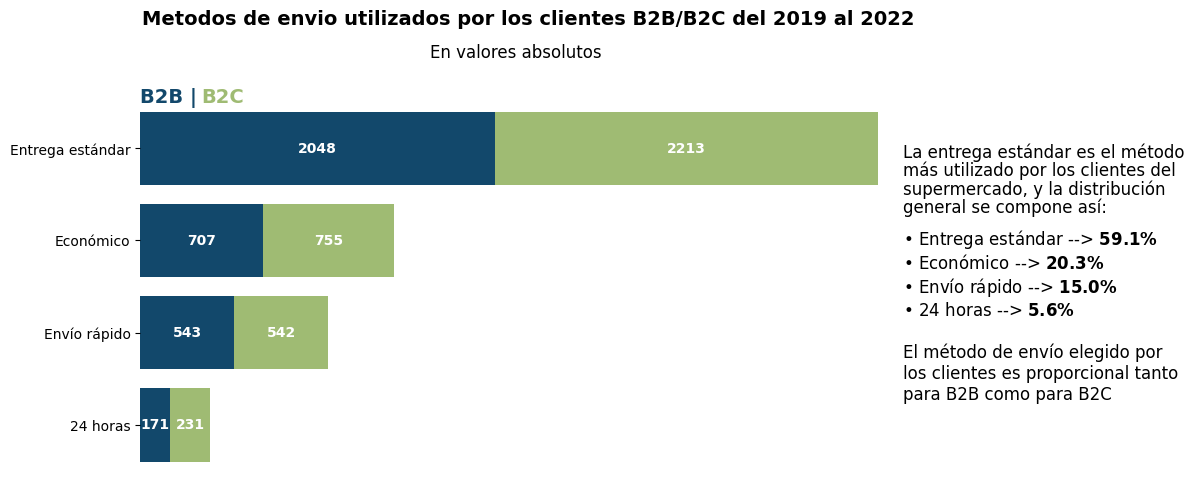

In [ ]:
# Configuración de los datos para el gráfico
ejeX = df_modo_envio.index
eje1Y = df_modo_envio['B2B']
eje2Y = df_modo_envio['B2C']
colores = ['#12486B', '#9FBB73']

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 5))

# Crear el gráfico de barras horizontales con etiquetas para las leyendas
barra1 = ax.barh(ejeX, eje1Y, color=colores[0], label='B2B')
barra2 = ax.barh(ejeX, eje2Y, left=eje1Y, color=colores[1], label='B2C')

# Colocar valores dentro de cada segmento
for container in [barra1, barra2]:
    labels = [f"{valor:.0f}" for valor in container.datavalues]  # Convertir a texto
    ax.bar_label(container, label_type='center', labels=labels, color='w', fontsize=10, fontweight='bold')

# Configuración de titulo y subtitulo
ax.set_title('Metodos de envio utilizados por los clientes B2B/B2C del 2019 al 2022', fontsize=14, fontweight='bold', pad=50)
fig.suptitle('En valores absolutos', fontsize=12)

# Quitar valores del eje x y todos los bordes
ax.set_xticks([])  # Quitar marcas del eje x
ax.spines['top'].set_color('none')  # Ocultar borde superior
ax.spines['right'].set_color('none')  # Ocultar borde derecho
ax.spines['bottom'].set_color('none')  # Ocultar borde inferior
ax.spines['left'].set_color('none')  # Ocultar borde izquierdo

# Agregar leyendas personalizadas
leyenda_custom = "B2B | "
ax.text(0, 3.55, leyenda_custom, ha='left', va='center', color='#12486B', fontsize=14, fontweight='bold')

leyenda_custom = "B2C"
ax.text(350, 3.56, leyenda_custom, ha='left', va='center', color='#9FBB73', fontsize=14, fontweight='bold')

# Texto en la parte derecha del gráfico
ax.text(4400,2.9,"La entrega estándar es el método",fontsize=12)
ax.text(4400,2.7,"más utilizado por los clientes del",fontsize=12)
ax.text(4400,2.5,"supermercado, y la distribución",fontsize=12)
ax.text(4400,2.3,"general se compone así:",fontsize=12)

texto_derecha = (
    f'\n'
    f'$\u2022$ Entrega estándar --> $\\bf{{{df_modo_envio.Porcentaje[3]}\%}}$\n'
    f'$\u2022$ Económico --> $\\bf{{{df_modo_envio.Porcentaje[2]}\%}}$\n'
    f'$\u2022$ Envío rápido --> $\\bf{{{df_modo_envio.Porcentaje[1]}\%}}$\n'
    f'$\u2022$ 24 horas --> $\\bf{{{df_modo_envio.Porcentaje[0]}\%}}$\n'
    f'\n'
    f'El método de envío elegido por\n'
    f'los clientes es proporcional tanto\n'
    f'para B2B como para B2C'

)

#Ubicar texto en la parte derecha del grafico
ax.text(4400, 1.3, texto_derecha, ha='left', va='center', fontsize=12)

# Mostrar el gráfico
plt.show()


## <font color='darkgrey' style='font-size: 33px;'> Conclusión de la cuarta pregunta </font>

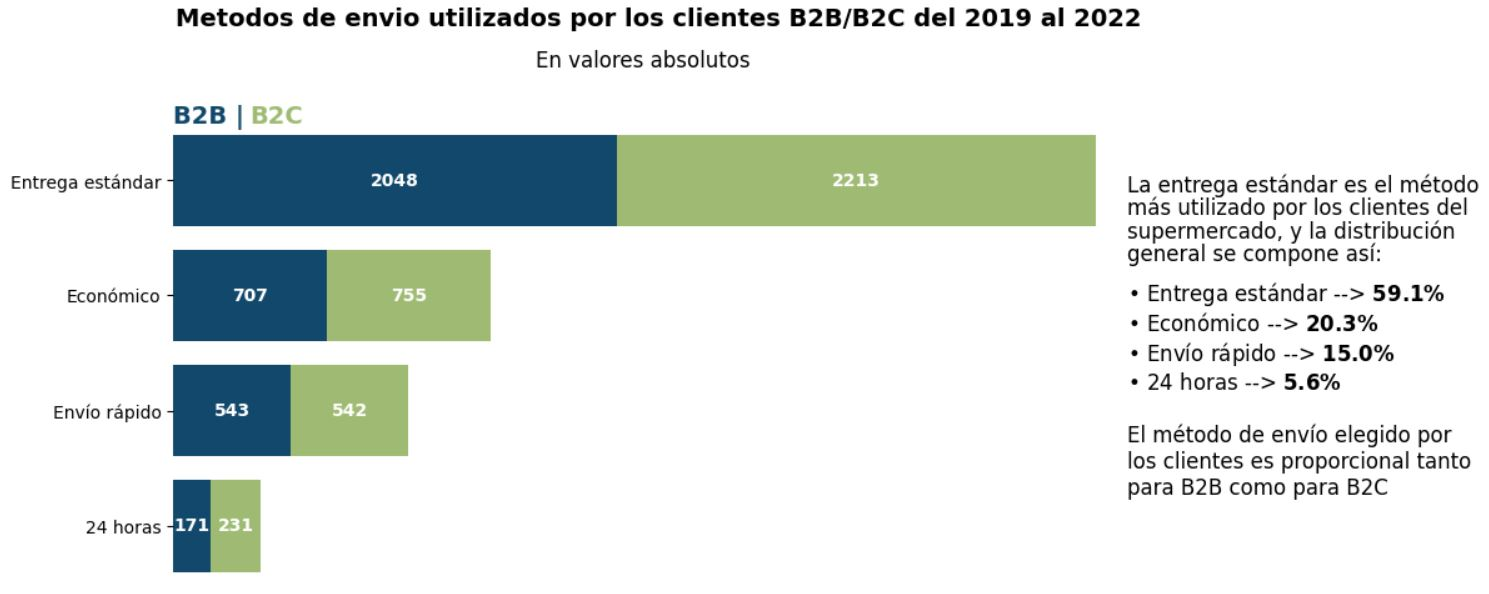

## <font color='orange' style='font-size: 33px;'>  5. ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo? </font>



### <font color='darkgrey' style='font-size: 33px;'> 5.1 Preparacion de los datos</font>

In [ ]:
def pregunta_5():
    # Definir variables globales
    global df_ventas_limpio, df_ventas_sp

    # Crear una copia de df_ventas_limpio con las columnas necesarias para São Paulo
    df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'][['fecha_pedido', 'total_venta']].copy()

    # Establecer la columna fecha_pedido como índice
    df_ventas_sp.set_index('fecha_pedido', inplace=True)

    # Agrupar las ventas por trimestre y redondear la columna total_venta
    df_ventas_sp = df_ventas_sp.resample('Q').agg({'total_venta': 'sum'})

    #redondear el valor de la columna total_venta para dejarlo en escala de miles.
    df_ventas_sp['total_venta'] = (df_ventas_sp['total_venta'] / 1000).round(2)

    # Resetear el índice
    df_ventas_sp.reset_index(inplace=True)

    return df_ventas_sp

# Llamar a la función para ejecutar el proceso
df_ventas_sp = pregunta_5()

# Mostrar el DataFrame resultante
df_ventas_sp

,fecha_pedido,total_venta
0,2019-03-31,27.38
1,2019-06-30,33.95
2,2019-09-30,90.21
3,2019-12-31,124.09
4,2020-03-31,26.73
5,2020-06-30,66.15
6,2020-09-30,109.18
7,2020-12-31,180.42
8,2021-03-31,35.74
9,2021-06-30,95.44


### <font color='darkgrey' style='font-size: 33px;'> 5.2 Visualización</font>

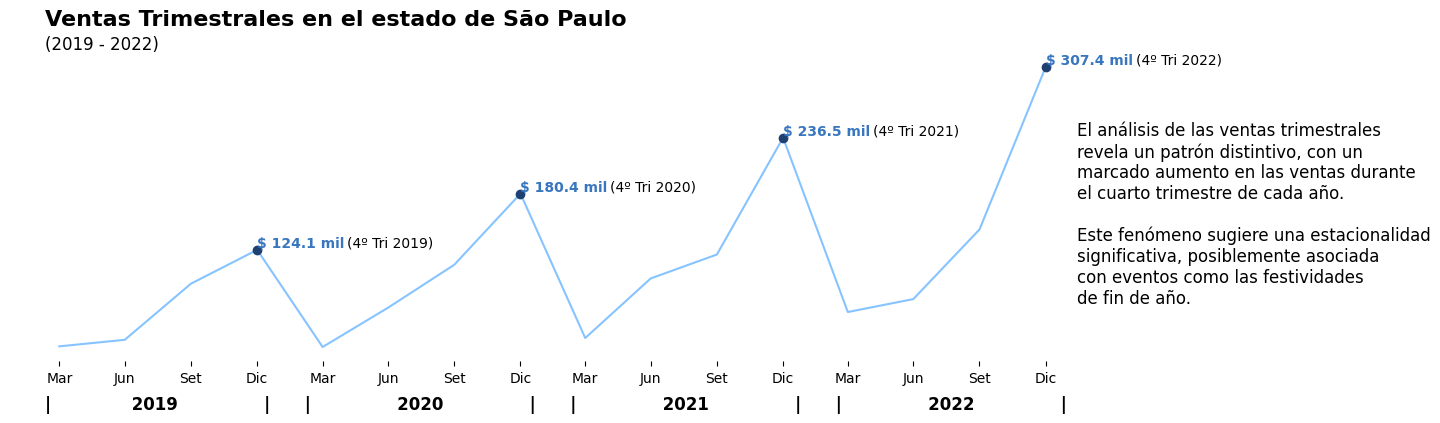

In [ ]:
# Configuración de la figura y el eje
fig, ax = plt.subplots(figsize=(14, 4))

# Crear el gráfico de líneas
ejeX = df_ventas_sp['fecha_pedido']
ejeY = df_ventas_sp['total_venta']
puntos_a_marcar = [False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, True]

# Crear marcas en los valores a señalar
ax.plot(ejeX, ejeY, marker="o", markevery=puntos_a_marcar, color='#87C4FF', markerfacecolor='#1F4172', markeredgecolor='#1F4172')

# Reemplazar las fechas en el ejeX por el nombre del mes
x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
ax.set_xticks(df_ventas_sp.fecha_pedido)
ax.set_xticklabels(x_labels, ha="center")

# Colocar valores solo en el 4to trimestre
for i in range(3, len(df_ventas_sp['total_venta']), 4):
    posicionX = ax.get_xticks()[i]
    posicionY = df_ventas_sp['total_venta'][i]
    texto = f'$ {posicionY:,.1f} mil'
    ax.text(posicionX, posicionY, texto, ha='left', va='bottom', color='#3876BF', fontsize=10, fontweight='bold')

    # Ajustar las coordenadas del segundo texto
    desplazamiento_horizontal = 125  # Ajusta según sea necesario
    desplazamiento_vertical = 3.5  # Ajusta según sea necesario
    texto2 = f'(4º Tri {df_ventas_sp["fecha_pedido"].iloc[i].year})'
    ax.text(posicionX + desplazamiento_horizontal, posicionY + desplazamiento_vertical, texto2, color='k', fontsize=10)

# Configuración de titulo y subtitulo
fig.text(00.15, 0.95, 'Ventas Trimestrales en el estado de São Paulo ', fontsize=16, fontweight='bold')
fig.text(00.15, 0.89, '(2019 - 2022)', fontsize=12)

fig.text(00.15, -0.01,
                   f'|              2019               |      |'
                   f'               2020               |      |'
                   f'               2021               |      |'
                   f'               2022               |', fontsize=12, fontweight='bold')


# Texto en la parte derecha del gráfico
texto_derecha = (
    f'\n'
    f'El análisis de las ventas trimestrales\n'
    f'revela un patrón distintivo, con un \n'
    f'marcado aumento en las ventas durante\n'
    f'el cuarto trimestre de cada año.\n'
    f'\n'
    f'Este fenómeno sugiere una estacionalidad\n'
    f'significativa, posiblemente asociada\n'
    f'con eventos como las festividades\n'
    f'de fin de año.\n'
)

ax.text(19400, 160, texto_derecha, ha='left', va='center', fontsize=12)


# Quitar valores del eje Y y todos los bordes
ax.set_yticks([])  # Quitar marcas del eje x
ax.spines['top'].set_color('none')  # Ocultar borde superior
ax.spines['right'].set_color('none')  # Ocultar borde derecho
ax.spines['bottom'].set_color('none')  # Ocultar borde inferior
ax.spines['left'].set_color('none')  # Ocultar borde izquierdo

# Mostrar el gráfico
plt.show()

## <font color='darkgrey' style='font-size: 33px;'> Conclusión de la quinta pregunta </font>

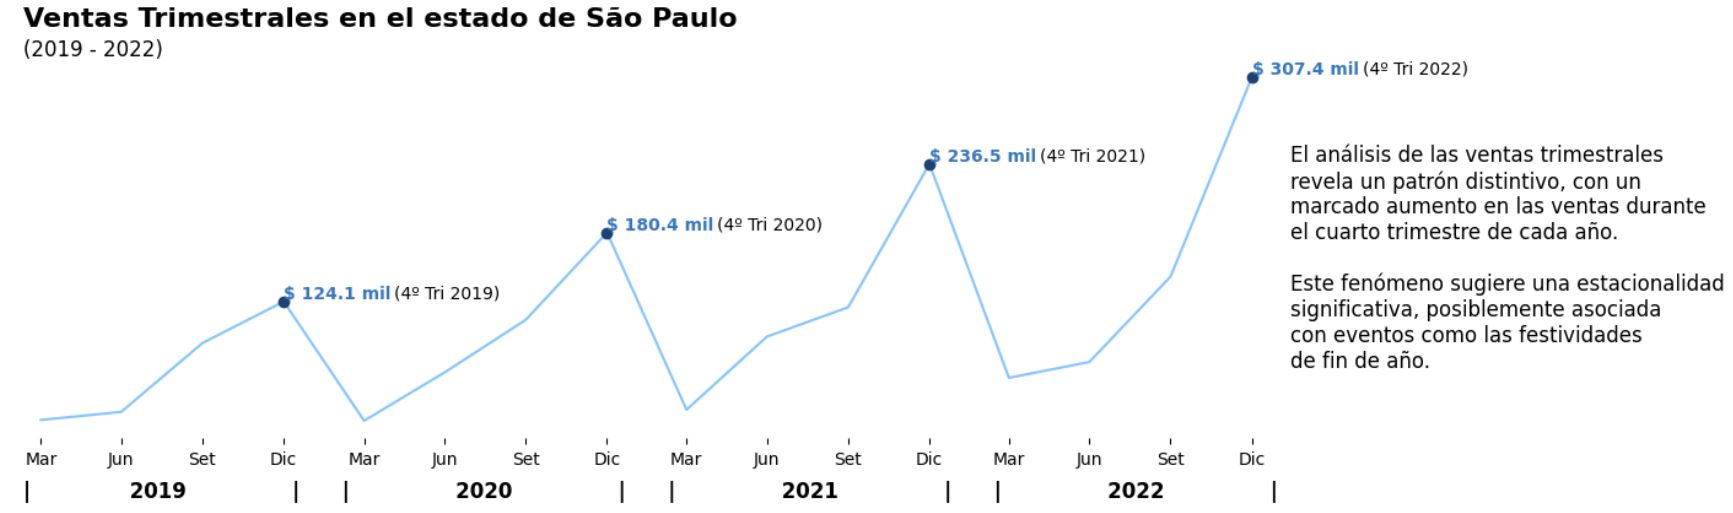

## <font color='orange' style='font-size: 33px;'>  6. ¿Totalizar el valor negativo de ventas por liquidacion? Identificar categorias y sugerir mejoras para futuras ventas </font>


### <font color='darkgrey' style='font-size: 33px;'> 6.1 Preparacion de los datos</font>

In [ ]:
# Crear una copia de df_ventas_liquidacion con las columnas necesarias
df_ventas_categoria = df_ventas_liquidacion[['departamento_producto', 'total_ganancia']].copy()

# Agrupar por 'año' y 'departamento_producto' y sumarizar las ganancias
df_ventas_categoria = df_ventas_categoria.groupby(['departamento_producto'])['total_ganancia'].sum().reset_index()

# Ordenar valores
df_ventas_categoria = df_ventas_categoria.sort_values('total_ganancia')

# Actualizar el indice utilizando el método reset_index
df_ventas_categoria = df_ventas_categoria.reset_index(drop=True)

# Mostrar el DataFrame resultante
df_ventas_categoria

,departamento_producto,total_ganancia
0,Ropa,-94726.31
1,Productos de Limpieza,-75668.31
2,Electrónicos,-72366.09


### <font color='darkgrey' style='font-size: 33px;'> 6.2 Visualización</font>

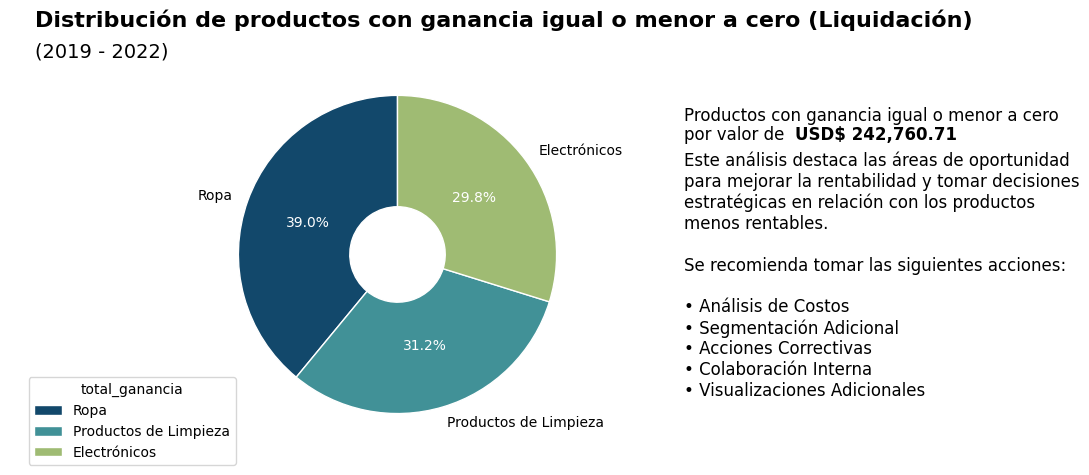

In [ ]:
# Tomar el valor absoluto de la columna 'total_ganancia'
df_ventas_categoria['total_ganancia'] = df_ventas_categoria['total_ganancia'].abs()

# Configuración del gráfico donut
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfico exterior (anillo completo)
ax.pie([100], radius=1.1, colors=['white'], wedgeprops=dict(width=0.3, edgecolor='white'))

# Gráfico interior (datos reales)
pie = ax.pie(df_ventas_categoria['total_ganancia'],
       labels=df_ventas_categoria['departamento_producto'], autopct='%1.1f%%', startangle=90,
       colors=['#12486B', '#419197', '#9FBB73', '#6AA3E6', '#87C4FF'], wedgeprops=dict(width=0.7, edgecolor='white'))

# Cambiar el color del texto de porcentaje
for text in pie[2]:
    text.set_color('w')

# Configuración de la leyenda
ax.legend(title='total_ganancia', bbox_to_anchor=(0.3, 0.2))

# Valor total resultados negativos
total_neg = df_ventas_categoria.total_ganancia.sum()
negativo = f'USD$ {total_neg:,.2f}'

# Añadir comentario
ax.text(1.8,0.84,"Productos con ganancia igual o menor a cero",fontsize=12)
ax.text(1.8,0.72,"por valor de ",fontsize=12)
ax.text(2.5,0.72,f"{negativo}",fontsize=12,fontweight='bold')


comentario_texto = (
                    f'\n'
                    f'\n'
                    f'\n'
                    f'Este análisis destaca las áreas de oportunidad\n'
                    f'para mejorar la rentabilidad y tomar decisiones\n'
                    f'estratégicas en relación con los productos\n'
                    f'menos rentables.\n'
                    f'\n'
                    f'Se recomienda tomar las siguientes acciones:\n'
                    f'\n'
                    f'\u2022 Análisis de Costos\n'
                    f'\u2022 Segmentación Adicional\n'
                    f'\u2022 Acciones Correctivas\n'
                    f'\u2022 Colaboración Interna\n'
                    f'\u2022 Visualizaciones Adicionales\n'

)
ax.text(1.8, 0, comentario_texto, ha='left', va='center', fontsize=12)

# Aspecto igual para asegurar que sea un círculo
ax.axis('equal')

# Configuración de titulo y subtitulo
fig.text(00.15, 0.95, 'Distribución de productos con ganancia igual o menor a cero (Liquidación)', fontsize=16, fontweight='bold')
fig.text(00.15, 0.89, '(2019 - 2022)', fontsize=14)

# Mostrar el gráfico
plt.show()

## <font color='darkgrey' style='font-size: 33px;'> Conclusión de la sexta pregunta</font>

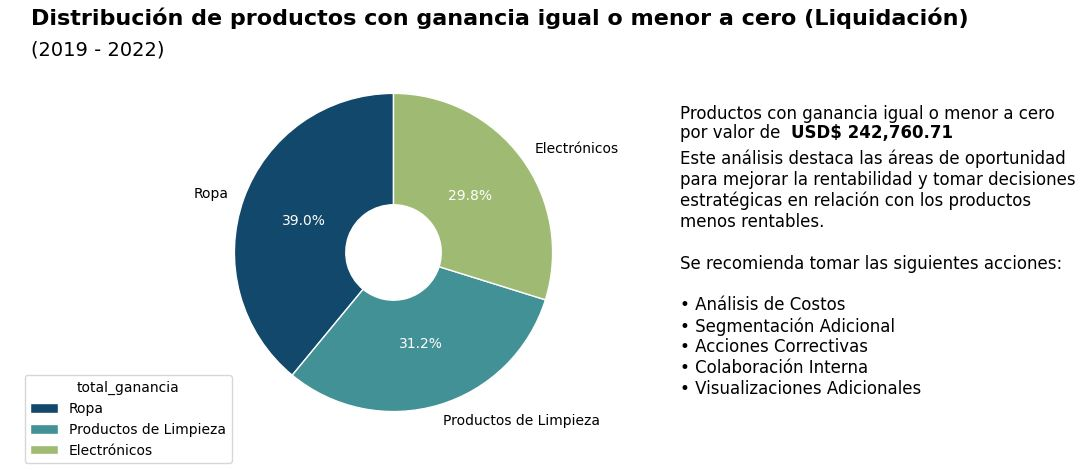